In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

%matplotlib inline

Download dataset



In [2]:
! wget "https://www.unsw.adfa.edu.au/unsw-canberra-cyber/cybersecurity/ADFA-NB15-Datasets/a%20part%20of%20training%20and%20testing%20set/UNSW_NB15_training-set.csv"
! wget "https://www.unsw.adfa.edu.au/unsw-canberra-cyber/cybersecurity/ADFA-NB15-Datasets/a%20part%20of%20training%20and%20testing%20set/UNSW_NB15_testing-set.csv"

--2020-12-19 05:23:03--  https://www.unsw.adfa.edu.au/unsw-canberra-cyber/cybersecurity/ADFA-NB15-Datasets/a%20part%20of%20training%20and%20testing%20set/UNSW_NB15_training-set.csv
Resolving www.unsw.adfa.edu.au (www.unsw.adfa.edu.au)... 202.58.60.197
Connecting to www.unsw.adfa.edu.au (www.unsw.adfa.edu.au)|202.58.60.197|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32293018 (31M) [text/csv]
Saving to: ‘UNSW_NB15_training-set.csv’

UNSW_NB15_training- 100%[===================>]  30.80M   288KB/s    in 2m 17s  

2020-12-19 05:25:21 (230 KB/s) - ‘UNSW_NB15_training-set.csv’ saved [32293018/32293018]

--2020-12-19 05:25:21--  https://www.unsw.adfa.edu.au/unsw-canberra-cyber/cybersecurity/ADFA-NB15-Datasets/a%20part%20of%20training%20and%20testing%20set/UNSW_NB15_testing-set.csv
Resolving www.unsw.adfa.edu.au (www.unsw.adfa.edu.au)... 202.58.60.197
Connecting to www.unsw.adfa.edu.au (www.unsw.adfa.edu.au)|202.58.60.197|:443... connected.
HTTP request sent, awai

In [4]:
trainSet = pd.read_csv('UNSW_NB15_training-set.csv')
testSet = pd.read_csv('UNSW_NB15_testing-set.csv')

print(trainSet.columns)
print(trainSet)

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')
            id       dur proto  ... is_sm_ips_ports attack_cat  label
0            1  0.121478   tcp  ...               0     Normal      0
1            2  0.649902   tcp  ...               0     Normal      0
2            3  1.623129   tcp  ...               0     Normal      0
3            4  1.681642   tcp  ...               0     Normal      0
4            5  0.449454   tcp  ...               0    

In [9]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.tree import DecisionTreeClassifier

class myClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, demo_param='demo'):
        self.demo_param = demo_param
        self.binary_tree = DecisionTreeClassifier()
        self.multi_tree = DecisionTreeClassifier()

        
        self.myEncoder = None
    
    def transform(self, y):
        return self.myEncoder.transform(y)

    def fit(self, X, y):
    
        idx = y=="Normal"
        yBin[idx] = 0
        yBin[np.invert(idx)] = 1
        yMulti = y[np.invert(idx)]
        xMulti = X[np.invert(idx)]
        self.binary_tree.fit(X,yBin)
        self.multi_tree.fit(X,yMulti)

    def predict(self, X):
        y1 = self.binary_tree.predict(X)
        idx = y1==1
        X2 = X[idx]
        y2 = self.multi_tree.predict(X2)

abc = trainSet.label.values==1
print(abc)
trainSet[abc]

[False False False ...  True  True  True]


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
47911,47912,0.000009,ddp,-,INT,2,0,200,0,111111.107200,254,0,8.888889e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,100,0,0,0,4,2,1,1,1,4,0,0,0,2,4,0,Backdoor,1
47912,47913,0.000009,ipv6-frag,-,INT,2,0,200,0,111111.107200,254,0,8.888889e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,100,0,0,0,7,2,2,2,2,7,0,0,0,2,7,0,Backdoor,1
47913,47914,0.000009,cftp,-,INT,2,0,200,0,111111.107200,254,0,8.888889e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,100,0,0,0,6,2,1,1,1,6,0,0,0,1,6,0,Backdoor,1
47914,47915,0.000003,wsn,-,INT,2,0,200,0,333333.321500,254,0,2.666667e+08,0.000000,0,0,0.003000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,100,0,0,0,6,2,2,2,2,7,0,0,0,2,6,0,Backdoor,1
47915,47916,0.000008,pvp,-,INT,2,0,200,0,125000.000300,254,0,1.000000e+08,0.000000,0,0,0.008000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,100,0,0,0,4,2,1,1,1,4,0,0,0,11,4,0,Backdoor,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,24,2,24,24,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,254,252,8.826286e+03,4903.492188,2,1,54.400111,66.98057,3721.068786,120.177727,255,3518776216,3453092386,255,0.09944,0.036895,0.062545,62,44,0,0,1,1,1,1,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,12,2,3,3,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,30,2,30,30,14,30,0,0,0,30,30,0,Generic,1


In [ ]:
numerical_feat = ["dur" , "sbytes", "dbytes", "sttl", "dttl", "sloss", "dloss",  "sload", "dload", "spkts", "dpkts", "swin", "dwin", "smean", "dmean", "trans_depth", "response_body_len", "sjit", "djit", "sinpkt" , "dinpkt", "tcprtt", "synack", "ackdat", "ct_state_ttl", "ct_flw_http_mthd", "ct_ftp_cmd", "ct_srv_src", "ct_srv_dst", "ct_dst_ltm","ct_src_ltm", "ct_src_dport_ltm", "ct_dst_sport_ltm", "ct_dst_src_ltm", "rate"]

trainX = trainSet[numerical_feat]
trainY = trainSet['label']

from imblearn.under_sampling import NearMiss
undersample = NearMiss(version=3, n_neighbors_ver3=3)
# transform the dataset
le = LabelEncoder()
le.fit(trainY)
# trainY = le.transform(trainY)


from imblearn.under_sampling import TomekLinks
undersample = TomekLinks()
trainX, trainY = undersample.fit_resample(trainX, trainY)


testX = testSet[numerical_feat]
testY = testSet['label']
# testY = le.transform(testY)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
from imblearn.ensemble import BalancedBaggingClassifier
# clf = BalancedBaggingClassifier(DecisionTreeClassifier())
clf.fit(trainX, trainY)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
yhat = clf.predict(testX)
print(accuracy_score(testY, yhat))

0.8670626244959433


Binary Classification (Final)



In [ ]:
numerical_feat = ["dur" , "sbytes", "dbytes", "sttl", "dttl", "sloss", "dloss",  "sload", "dload", "spkts", "dpkts", "swin", "dwin", "smean", "dmean", "trans_depth", "response_body_len", "sjit", "djit", "sinpkt" , "dinpkt", "tcprtt", "synack", "ackdat", "ct_state_ttl", "ct_flw_http_mthd", "ct_ftp_cmd", "ct_srv_src", "ct_srv_dst", "ct_dst_ltm","ct_src_ltm", "ct_src_dport_ltm", "ct_dst_sport_ltm", "ct_dst_src_ltm", "rate"]
# numerical_feat = ["sttl", "dur","spkts", "dpkts", "dttl", "sload", "dload","sloss", "swin" ,  "dwin", "trans_depth", "response_body_len", "dmean", "sinpkt", "ct_state_ttl", "ct_srv_src", "ct_srv_dst", "ct_dst_ltm", "ct_src_ltm", "ct_src_dport_ltm", "ct_dst_sport_ltm", "ct_dst_src_ltm"]
# numerical_feat = ["sttl", "dttl", "swin", "dwin", "dmean", "tcprtt", "ct_state_ttl", "ct_srv_src", "ct_srv_dst", "ct_dst_ltm", "ct_src_ltm", "ct_src_dport_ltm", "ct_dst_sport_ltm", "ct_dst_src_ltm", "rate"]


# numerical_feat = ["sttl", "dur","spkts", "dpkts", "dttl","sloss", "swin" ,  "dwin", "trans_depth", "response_body_len",  "ct_state_ttl",  "ct_dst_sport_ltm",  "is_ftp_login", "ct_ftp_cmd","ct_flw_http_mthd" ,"is_sm_ips_ports"]

categorical_feat = ["proto", "state", "service", "is_sm_ips_ports", "is_ftp_login"]

trainX = trainSet[numerical_feat+categorical_feat]
# trainX = trainSet[numerical_feat]

testX = testSet[numerical_feat + categorical_feat]
# testX = testSet[numerical_feat]

trainY = trainSet['label']


# transform the dataset
# le = LabelEncoder()
# le.fit(trainY)
# trainY = le.transform(trainY)

from category_encoders import TargetEncoder, LeaveOneOutEncoder
encoder = TargetEncoder()
trainX[categorical_feat] = encoder.fit_transform(trainX[categorical_feat], trainY)

testX[categorical_feat] = encoder.transform(testX[categorical_feat])

from imblearn.under_sampling import TomekLinks, RandomUnderSampler
undersample = RandomUnderSampler()
trainX, trainY = undersample.fit_resample(trainX, trainY)




testY = testSet['label']

from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier(max_depth=20)
clf1.fit(trainX, trainY)
yhat = clf1.predict(testX)
print(accuracy_score(testY, yhat))
print(classification_report(testY, yhat))

from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(class_weight = "balanced_subsample", n_estimators = 100)
clf2.fit(trainX, trainY)
yhat = clf2.predict(testX)
print(accuracy_score(testY, yhat))
print(classification_report(testY, yhat))


/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0.8912452023514551
              precision    recall  f1-score   support

           0       0.92      0.83      0.87     37000
           1       0.87      0.94      0.91     45332

    accuracy                           0.89     82332
   macro avg       0.90      0.89      0.89     82332
weighted avg       0.89      0.89      0.89     82332

0.9071199533595686
              precision    recall  f1-score   support

           0       0.95      0.83      0.89     37000
           1       0.88      0.97      0.92     45332

    accuracy                           0.91     82332
   macro avg       0.92      0.90      0.90     82332
weighted avg       0.91      0.91      0.91     82332



Random Forest

In [ ]:
numerical_feat = ["dur" , "sbytes", "dbytes", "sttl", "dttl", "sloss", "dloss",  "sload", "dload", "spkts", "dpkts", "swin", "dwin", "smean", "dmean", "trans_depth", "response_body_len", "sjit", "djit", "sinpkt" , "dinpkt", "tcprtt", "synack", "ackdat", "ct_state_ttl", "ct_flw_http_mthd", "ct_ftp_cmd", "ct_srv_src", "ct_srv_dst", "ct_dst_ltm","ct_src_ltm", "ct_src_dport_ltm", "ct_dst_sport_ltm", "ct_dst_src_ltm", "rate"]
# numerical_feat = ["sttl", "dur","spkts", "dpkts", "dttl", "sload", "dload","sloss", "swin" ,  "dwin", "trans_depth", "response_body_len", "dmean", "sinpkt", "ct_state_ttl", "ct_srv_src", "ct_srv_dst", "ct_dst_ltm", "ct_src_ltm", "ct_src_dport_ltm", "ct_dst_sport_ltm", "ct_dst_src_ltm"]
# numerical_feat = ["sttl", "dttl", "swin", "dwin", "dmean", "tcprtt", "ct_state_ttl", "ct_srv_src", "ct_srv_dst", "ct_dst_ltm", "ct_src_ltm", "ct_src_dport_ltm", "ct_dst_sport_ltm", "ct_dst_src_ltm", "rate"]


# numerical_feat = ["sttl", "dur","spkts", "dpkts", "dttl","sloss", "swin" ,  "dwin", "trans_depth", "response_body_len",  "ct_state_ttl",  "ct_dst_sport_ltm",  "is_ftp_login", "ct_ftp_cmd","ct_flw_http_mthd" ,"is_sm_ips_ports"]

categorical_feat = ["proto", "state", "service", "is_sm_ips_ports", "is_ftp_login"]

trainX = trainSet[numerical_feat+categorical_feat]
# trainX = trainSet[numerical_feat]

testX = testSet[numerical_feat + categorical_feat]
# testX = testSet[numerical_feat]

trainY = trainSet['label']


# transform the dataset
# le = LabelEncoder()
# le.fit(trainY)
# trainY = le.transform(trainY)

from category_encoders import TargetEncoder, LeaveOneOutEncoder
encoder = TargetEncoder()
trainX[categorical_feat] = encoder.fit_transform(trainX[categorical_feat], trainY)

testX[categorical_feat] = encoder.transform(testX[categorical_feat])

from imblearn.under_sampling import TomekLinks, RandomUnderSampler
undersample = RandomUnderSampler()
trainX, trainY = undersample.fit_resample(trainX, trainY)




testY = testSet['label']

from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(class_weight = "balanced_subsample", n_estimators = 100)
clf2.fit(trainX, trainY)
yhat = clf2.predict(testX)
print(accuracy_score(testY, yhat))
print(classification_report(testY, yhat))



/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0.9059296506826021
              precision    recall  f1-score   support

           0       0.95      0.83      0.89     37000
           1       0.88      0.97      0.92     45332

    accuracy                           0.91     82332
   macro avg       0.91      0.90      0.90     82332
weighted avg       0.91      0.91      0.91     82332



[0.12328767 0.1627907  0.         0.         0.         0.34042553
 0.1627907  0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.1627907  0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.02173913 0.         0.        ]
ROC Score for DT:  0.9065172397757326
ROC Score for RF:  0.9828426998647815


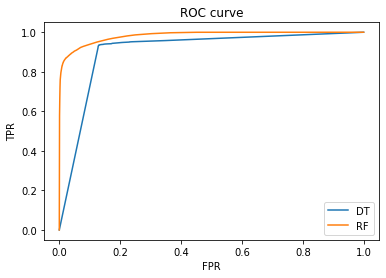

In [ ]:
def roc_curve_details(prediction1, prediction2,y_test):
    print("ROC Score for DT: ",roc_auc_score(y_test, prediction1))
    print("ROC Score for RF: ",roc_auc_score(y_test, prediction2))
    
    fpr1, tpr1, _ = roc_curve(y_test, prediction1)
    fpr2, tpr2, _ = roc_curve(y_test, prediction2)
    
    plt.plot(fpr1, tpr1, label = "DT")
    plt.plot(fpr2, tpr2, label = "RF")
    
    plt.legend()
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()

y_pred1 = clf1.predict_proba(testX)
y_pred2 = clf2.predict_proba(testX)
import numpy as np
print(y_pred1[50:80,1])
roc_curve_details(y_pred1[:,1], y_pred2[:,1],testY)

Multiclass Classification (Final)

In [ ]:
numerical_feat = ["dur" , "sbytes", "dbytes", "sttl", "dttl", "sloss", "dloss",  "sload", "dload", "spkts", "dpkts", "swin", "dwin", "smean", "dmean", "trans_depth", "response_body_len", "sjit", "djit", "sinpkt" , "dinpkt", "tcprtt", "synack", "ackdat", "ct_state_ttl", "ct_flw_http_mthd", "ct_ftp_cmd", "ct_srv_src", "ct_srv_dst", "ct_dst_ltm","ct_src_ltm", "ct_src_dport_ltm", "ct_dst_sport_ltm", "ct_dst_src_ltm", "rate"]
# numerical_feat = ["sttl", "dur","spkts", "dpkts", "dttl", "sload", "dload","sloss", "swin" ,  "dwin", "trans_depth", "response_body_len", "dmean", "sinpkt", "ct_state_ttl", "ct_srv_src", "ct_srv_dst", "ct_dst_ltm", "ct_src_ltm", "ct_src_dport_ltm", "ct_dst_sport_ltm", "ct_dst_src_ltm"]
# numerical_feat = ["sttl", "dttl", "swin", "dwin", "dmean", "tcprtt", "ct_state_ttl", "ct_srv_src", "ct_srv_dst", "ct_dst_ltm", "ct_src_ltm", "ct_src_dport_ltm", "ct_dst_sport_ltm", "ct_dst_src_ltm", "rate"]


# numerical_feat = ["sttl", "dur","spkts", "dpkts", "dttl","sloss", "swin" ,  "dwin", "trans_depth", "response_body_len",  "ct_state_ttl",  "ct_dst_sport_ltm",  "is_ftp_login", "ct_ftp_cmd","ct_flw_http_mthd" ,"is_sm_ips_ports"]

categorical_feat = ["proto", "state", "service", "is_sm_ips_ports", "is_ftp_login"]

trainX = trainSet[numerical_feat+categorical_feat]
# trainX = trainSet[numerical_feat]

testX = testSet[numerical_feat + categorical_feat]
# testX = testSet[numerical_feat]

trainY = trainSet['attack_cat']
testY = testSet['attack_cat']

# transform the dataset
le = LabelEncoder()
le.fit(trainY)
trainY = le.transform(trainY)
testY = le.transform(testY)
from category_encoders import TargetEncoder, LeaveOneOutEncoder
encoder = TargetEncoder()
trainX[categorical_feat] = encoder.fit_transform(trainX[categorical_feat], trainY)

testX[categorical_feat] = encoder.transform(testX[categorical_feat])

from imblearn.under_sampling import TomekLinks, RandomUnderSampler
undersample = TomekLinks()
trainX, trainY = undersample.fit_resample(trainX, trainY)

from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier(max_depth=20)
clf1.fit(trainX, trainY)
yhat = clf1.predict(testX)
print(accuracy_score(testY, yhat))
print(classification_report(testY, yhat))

from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(class_weight = "balanced_subsample", n_estimators = 100)
clf2.fit(trainX, trainY)
yhat = clf2.predict(testX)
print(accuracy_score(testY, yhat))
print(classification_report(testY, yhat))



def roc_curve_details(prediction1, prediction2,y_test):
    print("ROC Score for DT: ",roc_auc_score(y_test, prediction1))
    print("ROC Score for RF: ",roc_auc_score(y_test, prediction2))
    
    fpr1, tpr1, _ = roc_curve(y_test, prediction1)
    fpr2, tpr2, _ = roc_curve(y_test, prediction2)
    
    plt.plot(fpr1, tpr1, label = "DT")
    plt.plot(fpr2, tpr2, label = "RF")
    
    plt.legend()
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve for multiclass classification')
    plt.show()

y_pred1 = clf1.predict_proba(testX)
y_pred2 = clf2.predict_proba(testX)


roc_curve_details(y_pred1, y_pred2,testY)

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0.7450201622698344
              precision    recall  f1-score   support

           0       0.02      0.08      0.04       677
           1       0.03      0.09      0.05       583
           2       0.36      0.18      0.24      4089
           3       0.62      0.76      0.69     11132
           4       0.27      0.53      0.36      6062
           5       0.99      0.98      0.98     18871
           6       0.96      0.74      0.83     37000
           7       0.92      0.80      0.85      3496
           8       0.39      0.67      0.49       378
           9       0.61      0.70      0.65        44

    accuracy                           0.75     82332
   macro avg       0.52      0.55      0.52     82332
weighted avg       0.82      0.75      0.77     82332

0.7499878540543167
              precision    recall  f1-score   support

           0       0.02      0.03      0.02       677
           1       0.04      0.32      0.07       583
           2       0.32      0.24      0

ValueError: ignored

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


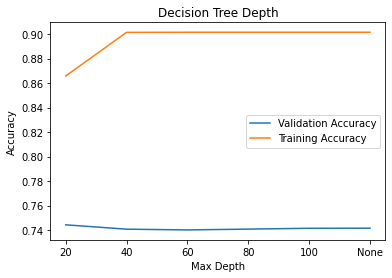

In [ ]:
numerical_feat = ["dur" , "sbytes", "dbytes", "sttl", "dttl", "sloss", "dloss",  "sload", "dload", "spkts", "dpkts", "swin", "dwin", "smean", "dmean", "trans_depth", "response_body_len", "sjit", "djit", "sinpkt" , "dinpkt", "tcprtt", "synack", "ackdat", "ct_state_ttl", "ct_flw_http_mthd", "ct_ftp_cmd", "ct_srv_src", "ct_srv_dst", "ct_dst_ltm","ct_src_ltm", "ct_src_dport_ltm", "ct_dst_sport_ltm", "ct_dst_src_ltm", "rate"]
# numerical_feat = ["sttl", "dur","spkts", "dpkts", "dttl", "sload", "dload","sloss", "swin" ,  "dwin", "trans_depth", "response_body_len", "dmean", "sinpkt", "ct_state_ttl", "ct_srv_src", "ct_srv_dst", "ct_dst_ltm", "ct_src_ltm", "ct_src_dport_ltm", "ct_dst_sport_ltm", "ct_dst_src_ltm"]
# numerical_feat = ["sttl", "dttl", "swin", "dwin", "dmean", "tcprtt", "ct_state_ttl", "ct_srv_src", "ct_srv_dst", "ct_dst_ltm", "ct_src_ltm", "ct_src_dport_ltm", "ct_dst_sport_ltm", "ct_dst_src_ltm", "rate"]


# numerical_feat = ["sttl", "dur","spkts", "dpkts", "dttl","sloss", "swin" ,  "dwin", "trans_depth", "response_body_len",  "ct_state_ttl",  "ct_dst_sport_ltm",  "is_ftp_login", "ct_ftp_cmd","ct_flw_http_mthd" ,"is_sm_ips_ports"]

categorical_feat = ["proto", "state", "service", "is_sm_ips_ports", "is_ftp_login"]

trainX = trainSet[numerical_feat+categorical_feat]
# trainX = trainSet[numerical_feat]

testX = testSet[numerical_feat + categorical_feat]
# testX = testSet[numerical_feat]

trainY = trainSet['attack_cat']
testY = testSet['attack_cat']

# transform the dataset
le = LabelEncoder()
le.fit(trainY)
trainY = le.transform(trainY)
testY = le.transform(testY)
from category_encoders import TargetEncoder, LeaveOneOutEncoder
encoder = TargetEncoder()
trainX[categorical_feat] = encoder.fit_transform(trainX[categorical_feat], trainY)

testX[categorical_feat] = encoder.transform(testX[categorical_feat])

from imblearn.under_sampling import TomekLinks, RandomUnderSampler
undersample = TomekLinks()
trainX, trainY = undersample.fit_resample(trainX, trainY)



from sklearn.tree import DecisionTreeClassifier

hts = [20,40,60,80,100, None]

acc = []
acc2 = []
for i in hts:
    clf1 = DecisionTreeClassifier(max_depth = i)
    clf1.fit(trainX, trainY)
    yhat = clf1.predict(testX)
    yhat2 = clf1.predict(trainX)
    acc.append(accuracy_score(testY, yhat))
    acc2.append(accuracy_score(trainY, yhat2))
    
hts[-1] = "None"
plt.plot(hts, acc, label = "Validation Accuracy")
plt.plot(hts, acc2, label = "Training Accuracy")
plt.legend()
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Depth")
plt.show()

Multiclass classification

In [ ]:
numerical_feat = ["dur" , "sbytes", "dbytes", "sttl", "dttl", "sloss", "dloss",  "sload", "dload", "spkts", "dpkts", "swin", "dwin", "smean", "dmean", "trans_depth", "response_body_len", "sjit", "djit", "sinpkt" , "dinpkt", "tcprtt", "synack", "ackdat", "ct_state_ttl", "ct_flw_http_mthd", "ct_ftp_cmd", "ct_srv_src", "ct_srv_dst", "ct_dst_ltm","ct_src_ltm", "ct_src_dport_ltm", "ct_dst_sport_ltm", "ct_dst_src_ltm", "rate"]
# numerical_feat = ["sttl", "dur","spkts", "dpkts", "dttl", "sload", "dload","sloss", "swin" ,  "dwin", "trans_depth", "response_body_len", "dmean", "sinpkt", "ct_state_ttl", "ct_srv_src", "ct_srv_dst", "ct_dst_ltm", "ct_src_ltm", "ct_src_dport_ltm", "ct_dst_sport_ltm", "ct_dst_src_ltm"]
# numerical_feat = ["sttl", "dttl", "swin", "dwin", "dmean", "tcprtt", "ct_state_ttl", "ct_srv_src", "ct_srv_dst", "ct_dst_ltm", "ct_src_ltm", "ct_src_dport_ltm", "ct_dst_sport_ltm", "ct_dst_src_ltm", "rate"]


# numerical_feat = ["sttl", "dur","spkts", "dpkts", "dttl","sloss", "swin" ,  "dwin", "trans_depth", "response_body_len",  "ct_state_ttl",  "ct_dst_sport_ltm",  "is_ftp_login", "ct_ftp_cmd","ct_flw_http_mthd" ,"is_sm_ips_ports"]

categorical_feat = ["proto", "state", "service", "is_sm_ips_ports", "is_ftp_login"]

trainX = trainSet[numerical_feat+categorical_feat]
# trainX = trainSet[numerical_feat]

testX = testSet[numerical_feat + categorical_feat]
# testX = testSet[numerical_feat]

trainY = trainSet['attack_cat']
testY = testSet['attack_cat']

# transform the dataset
le = LabelEncoder()
le.fit(trainY)
trainY = le.transform(trainY)
testY = le.transform(testY)
from category_encoders import TargetEncoder, LeaveOneOutEncoder
encoder = TargetEncoder()
trainX[categorical_feat] = encoder.fit_transform(trainX[categorical_feat], trainY)

testX[categorical_feat] = encoder.transform(testX[categorical_feat])

from imblearn.under_sampling import TomekLinks, RandomUnderSampler
undersample = RandomUnderSampler()
trainX, trainY = undersample.fit_resample(trainX, trainY)






from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(class_weight = "balanced_subsample", n_estimators = 100)
clf.fit(trainX, trainY)
yhat = clf.predict(testX)
print(accuracy_score(testY, yhat))
print(classification_report(testY, yhat))



/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0.6180221542049263
              precision    recall  f1-score   support

           0       0.04      0.35      0.07       677
           1       0.07      0.44      0.12       583
           2       0.27      0.12      0.17      4089
           3       0.74      0.51      0.60     11132
           4       0.20      0.56      0.29      6062
           5       0.99      0.93      0.96     18871
           6       0.99      0.54      0.70     37000
           7       0.80      0.82      0.81      3496
           8       0.11      0.89      0.20       378
           9       0.03      0.84      0.05        44

    accuracy                           0.62     82332
   macro avg       0.42      0.60      0.40     82332
weighted avg       0.84      0.62      0.68     82332



DT: Multiclass

In [ ]:
numerical_feat = ["dur" , "sbytes", "dbytes", "sttl", "dttl", "sloss", "dloss",  "sload", "dload", "spkts", "dpkts", "swin", "dwin", "smean", "dmean", "trans_depth", "response_body_len", "sjit", "djit", "sinpkt" , "dinpkt", "tcprtt", "synack", "ackdat", "ct_state_ttl", "ct_flw_http_mthd", "ct_ftp_cmd", "ct_srv_src", "ct_srv_dst", "ct_dst_ltm","ct_src_ltm", "ct_src_dport_ltm", "ct_dst_sport_ltm", "ct_dst_src_ltm", "rate"]
# numerical_feat = ["sttl", "dur","spkts", "dpkts", "dttl", "sload", "dload","sloss", "swin" ,  "dwin", "trans_depth", "response_body_len", "dmean", "sinpkt", "ct_state_ttl", "ct_srv_src", "ct_srv_dst", "ct_dst_ltm", "ct_src_ltm", "ct_src_dport_ltm", "ct_dst_sport_ltm", "ct_dst_src_ltm"]
# numerical_feat = ["sttl", "dttl", "swin", "dwin", "dmean", "tcprtt", "ct_state_ttl", "ct_srv_src", "ct_srv_dst", "ct_dst_ltm", "ct_src_ltm", "ct_src_dport_ltm", "ct_dst_sport_ltm", "ct_dst_src_ltm", "rate"]


# numerical_feat = ["sttl", "dur","spkts", "dpkts", "dttl","sloss", "swin" ,  "dwin", "trans_depth", "response_body_len",  "ct_state_ttl",  "ct_dst_sport_ltm",  "is_ftp_login", "ct_ftp_cmd","ct_flw_http_mthd" ,"is_sm_ips_ports"]

categorical_feat = ["proto", "state", "service", "is_sm_ips_ports", "is_ftp_login"]

trainX = trainSet[numerical_feat+categorical_feat]
# trainX = trainSet[numerical_feat]

testX = testSet[numerical_feat + categorical_feat]
# testX = testSet[numerical_feat]

trainY = trainSet['attack_cat']
testY = testSet['attack_cat']

# transform the dataset
le = LabelEncoder()
le.fit(trainY)
trainY = le.transform(trainY)
testY = le.transform(testY)
from category_encoders import TargetEncoder, LeaveOneOutEncoder
encoder = TargetEncoder()
trainX[categorical_feat] = encoder.fit_transform(trainX[categorical_feat], trainY)

testX[categorical_feat] = encoder.transform(testX[categorical_feat])

from imblearn.under_sampling import TomekLinks, RandomUnderSampler
undersample = RandomUnderSampler()
trainX, trainY = undersample.fit_resample(trainX, trainY)






from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(trainX, trainY)
yhat = clf.predict(testX)
print(accuracy_score(testY, yhat))
print(classification_report(testY, yhat))



/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0.654897245299519
              precision    recall  f1-score   support

           0       0.02      0.12      0.04       677
           1       0.05      0.26      0.08       583
           2       0.23      0.20      0.21      4089
           3       0.61      0.42      0.50     11132
           4       0.24      0.46      0.32      6062
           5       0.96      0.94      0.95     18871
           6       0.96      0.66      0.78     37000
           7       0.71      0.80      0.76      3496
           8       0.10      0.93      0.18       378
           9       0.04      0.91      0.07        44

    accuracy                           0.65     82332
   macro avg       0.39      0.57      0.39     82332
weighted avg       0.79      0.65      0.70     82332



In [ ]:
! pip3 install category_encoders

     |████████████████████████████████| 81kB 3.5MB/s 


In [ ]:
testSet_X = testSet[["dur", "spkts", "sttl", "ct_dst_sport_ltm", "rate", "ct_state_ttl", "ct_srv_dst", "ct_srv_src", "ct_dst_src_ltm", "ct_src_ltm", "service", "proto", "ct_dst_ltm"]]
testSet_X = pd.get_dummies(testSet_X, columns=["proto", "service"])
testSet_Y = testSet["label"]


In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear', verbose=True) # Linear Kernel

#Train the model using the training sets
clf.fit(trainSet_X.values, trainSet_Y.values)
print("Done Training")
#Predict the response for test dataset


[LibSVM]

In [ ]:
y_pred = clf.predict(testSet_X)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(testSet_Y,y_pred))
print(classification_report(testSet_Y,y_pred))

In [ ]:
#Feature Selection  -  Low Variance 

from sklearn.feature_selection import VarianceThreshold
X = trainSet_X
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
print(sel.fit_transform(X))




In [ ]:
#Feature Selection -  Univariate feature selection

from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X, y = trainSet_X , trainSet_Y
X.shape
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
X_new.shape

In [ ]:
#Feature Selection -  L1 feature selection
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
X, y = trainSet_X , trainSet_Y
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
print(X_new.shape)

In [ ]:
#Feature Selection -  Tree based feature selection
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.feature_selection import SelectFromModel
X, y = trainSet_X , trainSet_Y
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
print(clf.feature_importances_)
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
print(X_new.shape) 

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(verbose=True) # Linear Kernel

#Train the model using the training sets
x = [[1, 4],[2, 7], [3,3], [8,8]]
y = [1, 1, 1, 0]
clf.fit(x, y)
print("Done Training")
#Predict the response for test dataset

[LibSVM]Done Training


In [ ]:
clf.predict([[6,1]])

array([1])

In [ ]:
    from thundersvmScikit import SVC 
    #... then import all your sklearn stuff as usual 
    clf = SVC(kernel='linear').fit(train_x, train_y) # same params 

In [ ]:
l = trainSet.columns.values
print(l)


['id' 'dur' 'proto' 'service' 'state' 'spkts' 'dpkts' 'sbytes' 'dbytes'
 'rate' 'sttl' 'dttl' 'sload' 'dload' 'sloss' 'dloss' 'sinpkt' 'dinpkt'
 'sjit' 'djit' 'swin' 'stcpb' 'dtcpb' 'dwin' 'tcprtt' 'synack' 'ackdat'
 'smean' 'dmean' 'trans_depth' 'response_body_len' 'ct_srv_src'
 'ct_state_ttl' 'ct_dst_ltm' 'ct_src_dport_ltm' 'ct_dst_sport_ltm'
 'ct_dst_src_ltm' 'is_ftp_login' 'ct_ftp_cmd' 'ct_flw_http_mthd'
 'ct_src_ltm' 'ct_srv_dst' 'is_sm_ips_ports' 'attack_cat' 'label']


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


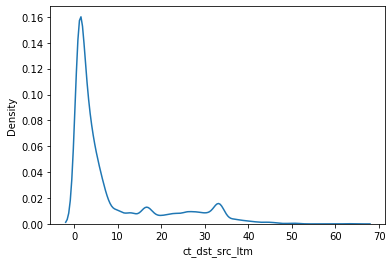

In [ ]:
l = ["ct_state_ttl", "ct_flw_http_mthd", "ct_ftp_cmd", "ct_srv_src", "ct_srv_dst", "ct_dst_ltm","ct_src_ltm", "ct_src_dport_ltm", "ct_dst_sport_ltm", "ct_dst_src_ltm"]

sns.distplot(trainSet[l[9]], hist=False)

In [ ]:
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

In [ ]:
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif), k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	# X_test_fs = fs.transform(X_test)
	X_test_fs = None
	return X_train_fs, X_test_fs, fs

SyntaxError: ignored

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


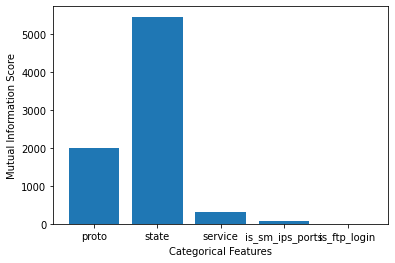

In [ ]:
"""
  Feature selection
"""
cat_variables = ["proto", "state", "service", "is_sm_ips_ports", "is_ftp_login" ]

X_train = trainSet[cat_variables]
y_train = trainSet["label"]
X_test = testSet[cat_variables]
# y_test = testSet["label"]



X_train = X_train.astype(str)
X_test = X_test.astype(str)

oe = TargetEncoder()
oe.fit(X_train, y_train)
X_train = oe.transform(X_train)
# X_test = oe.transform(X_test)

# le = LabelEncoder()
# le.fit(y_train)
# y_train = le.transform(y_train)
# y_test = le.transform(y_test)

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)


pyplot.bar(cat_variables, fs.scores_)

pyplot.xlabel("Categorical Features")
pyplot.ylabel("Mutual Information Score")


pyplot.show()

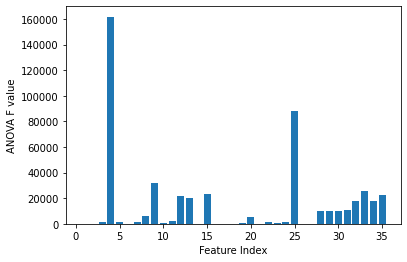

In [ ]:

# print(trainSet.columns)
numerical_feat = ["dur" , "sbytes", "dbytes", "sttl", "dttl", "sloss", "dloss",  "sload", "dload", "spkts", "dpkts", "swin", "dwin", "smean", "dmean", "trans_depth", "response_body_len", "sjit", "djit", "sinpkt" , "dinpkt", "tcprtt", "synack", "ackdat", "ct_state_ttl", "ct_flw_http_mthd", "ct_ftp_cmd", "ct_srv_src", "ct_srv_dst", "ct_dst_ltm","ct_src_ltm", "ct_src_dport_ltm", "ct_dst_sport_ltm", "ct_dst_src_ltm", "rate"]
# ["smeans", "dmeans", , "sintpkt", "dintpkt", "ct_src_ ltm", "res_bdy_len"]
X_train = trainSet[numerical_feat]
y_train = trainSet["label"]
X_test = testSet[numerical_feat]
y_test = testSet["label"]



# X_train = X_train.astype(str)
# X_test = X_test.astype(str)

# oe = OrdinalEncoder()
# oe.fit(X_train)
# X_train = oe.transform(X_train)
# X_test = oe.transform(X_test)

# le = LabelEncoder()
# le.fit(y_train)
# y_train = le.transform(y_train)
# y_test = le.transform(y_test)

fs = SelectKBest(score_func=f_classif, k=15)
X_selected = fs.fit_transform(X_train, y_train)
mask = fs.get_support()
l = []
for i, feature in zip(mask, numerical_feat):
    if i:
        l.append(feature)
# print(l)
# print(len(numerical_feat))
plt.xlabel("Feature Index")
plt.ylabel("ANOVA F value")
# pyplot.bar(cat_variables, fs.scores_)
pyplot.bar([i+1 for i in range(len(numerical_feat))], fs.scores_)
plt.savefig('numerical_feat.png')
pyplot.show()

Text(0.5, 1.0, 'Pie chart for state')

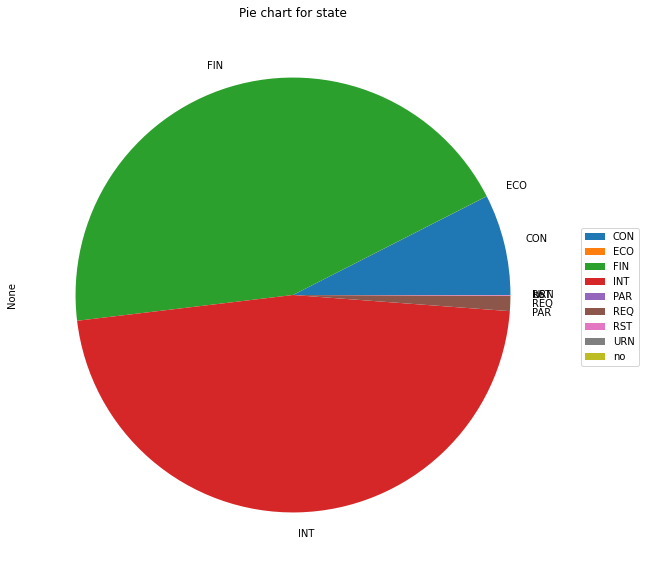

In [ ]:
trainSet.groupby('label').size().plot(kind='pie', figsize = (10,10))
plt.legend(bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.title("Dustribution between normal and")

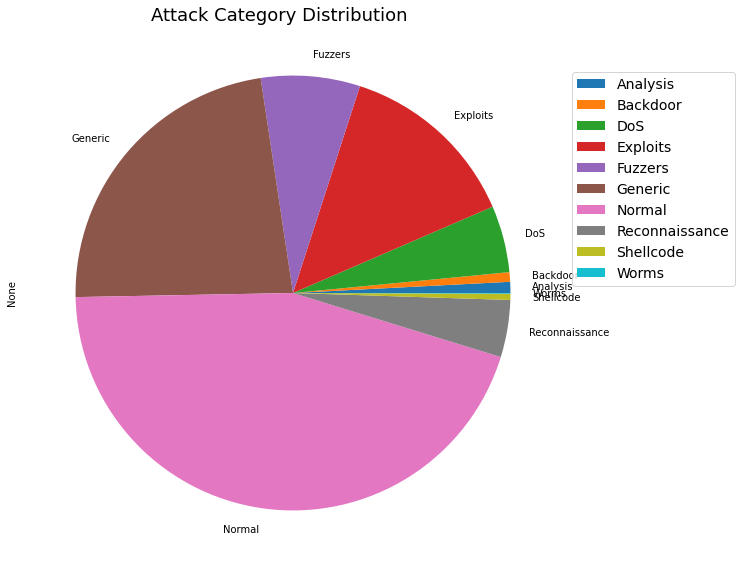

In [ ]:
testSet.groupby('attack_cat').size().plot(kind='pie', figsize = (15,10))
plt.legend(bbox_to_anchor=(1,0.5), loc="lower left", fontsize=14, 
           )
# plt.figtext(.5,.8,"Attack Category Distribution",fontsize=18,ha='cc')
plt.suptitle("Attack Category Distribution", fontsize=18, y = 0.9) # Add the text/suptitle to figure
# plt.title("Attack Category Distribution", fontdict=18)
plt.savefig('distribution2.png')

In [14]:
a = np.array([True, False, True])
np.invert(a)

array([False,  True, False])

In [12]:
b

['/bin/bash: a: command not found']